In [110]:
import pandas as pd
import numpy as np
import xlsxwriter


path=(r'C:\Users\Apoorva Choudhary\Desktop\\ds_project.xlsx')
xl = pd.ExcelFile(path)

In [111]:
print(xl.sheet_names)

df= xl.parse('Sheet1')
df.head(10)


['Sheet1', 'Sheet2', 'Sheet3']


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.35,3.49,3.10,0.74,11.68,NaN,NaN,NaN,NaN,NaN,NaN
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,NaN,NaN,NaN,NaN,NaN,NaN
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,5.7,1443.0,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5.0,398.0,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN,NaN,NaN
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN,NaN,NaN,NaN
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M


In [112]:
df[df.isnull().any(axis=1)]
df.isnull().sum()


Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score       975
Critic_Count       975
User_Score         805
User_Count         805
Developer          689
Rating             751
dtype: int64

In [113]:
df['Critic_Score'] = df['Critic_Score'].fillna((df['Critic_Score'].mean()))
df['Critic_Count'] = df['Critic_Count'].fillna((df['Critic_Count'].mean()))
df['User_Count'] = df['User_Count'].fillna((df['User_Count'].mean()))


In [114]:
df.User_Score.dtype


dtype('float64')

In [115]:
df['User_Score'] = df['User_Score'].fillna((df['User_Score'].mean()))

df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,72.306407,30.637883,6.623536,342.925676,NaN,NaN
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.000000,66.000000,8.300000,2899.000000,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.35,3.49,3.10,0.74,11.68,72.306407,30.637883,6.623536,342.925676,NaN,NaN
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.000000,42.000000,4.300000,896.000000,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,72.306407,30.637883,6.623536,342.925676,NaN,NaN
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.000000,39.000000,5.700000,1443.000000,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.000000,41.000000,5.000000,398.000000,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,72.306407,30.637883,6.623536,342.925676,NaN,NaN
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,72.306407,30.637883,6.623536,342.925676,NaN,NaN
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.000000,58.000000,6.500000,4228.000000,Bethesda Game Studios,M


In [116]:
df.isnull().sum()

Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer          689
Rating             751
dtype: int64

In [117]:
df.fillna(method='bfill', inplace=True)

In [118]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,72.306407,30.637883,6.623536,342.925676,Rockstar North,M
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.000000,66.000000,8.300000,2899.000000,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.35,3.49,3.10,0.74,11.68,72.306407,30.637883,6.623536,342.925676,EA Sports,E
3,FIFA 16,PS4,2015,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.000000,42.000000,4.300000,896.000000,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,72.306407,30.637883,6.623536,342.925676,Sledgehammer Games,M
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.000000,39.000000,5.700000,1443.000000,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.000000,41.000000,5.000000,398.000000,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,72.306407,30.637883,6.623536,342.925676,Bethesda Game Studios,M
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.59,2.11,0.01,0.68,7.39,72.306407,30.637883,6.623536,342.925676,Bethesda Game Studios,M
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.000000,58.000000,6.500000,4228.000000,Bethesda Game Studios,M


In [119]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [120]:
cols=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']

In [121]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [122]:
for i in cols:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])

In [123]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,143,132,33,67,226,41,27,52,209,Rockstar North,M
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,140,134,35,66,225,65,62,69,367,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,141,129,60,55,224,41,27,52,209,EA Sports,E
3,FIFA 16,PS4,2015,Sports,Electronic Arts,93,133,6,65,223,51,39,28,300,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,136,129,22,65,222,41,27,52,209,Sledgehammer Games,M
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,134,128,14,64,221,52,36,42,335,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,65,131,8,62,220,54,38,35,228,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,139,98,56,43,219,41,27,52,209,Bethesda Game Studios,M
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,142,118,1,52,218,41,27,52,209,Bethesda Game Studios,M
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,129,127,24,63,217,56,55,50,377,Bethesda Game Studios,M


In [124]:
for i in cols:                                  #standardization of data
    df[i]=(df[i]-df[i].mean())/df[i].std()

In [125]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,4.946975,5.038574,3.548783,6.577938,4.189395,0.002522,0.009945,0.004914,0.547774,Rockstar North,M
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,4.832474,5.122745,3.794031,6.473192,4.168065,3.015974,2.339185,1.463098,2.220277,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.870641,4.912317,6.859632,5.320991,4.146735,0.002522,0.009945,0.004914,0.547774,EA Sports,E
3,FIFA 16,PS4,2015,Sports,Electronic Arts,3.038639,5.080659,0.237933,6.368447,4.125405,1.258127,0.808542,-2.053697,1.511051,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,4.679807,4.912317,2.199918,6.368447,4.104076,0.002522,0.009945,0.004914,0.547774,Sledgehammer Games,M
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,4.603474,4.870231,1.218925,6.263701,4.082746,1.383687,0.608893,-0.852840,1.881542,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,1.969971,4.996488,0.483181,6.054210,4.061416,1.634808,0.741992,-1.453269,0.748898,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,4.794308,3.607660,6.369136,4.064043,4.040087,0.002522,0.009945,0.004914,0.547774,Bethesda Game Studios,M
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.908808,4.449374,-0.375188,5.006754,4.018757,0.002522,0.009945,0.004914,0.547774,Bethesda Game Studios,M
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,4.412640,4.828145,2.445166,6.158956,3.997427,1.885930,1.873337,-0.166637,2.326131,Bethesda Game Studios,M


In [126]:
df.mean()

Year_of_Release    2.014960e+03
NA_Sales           8.330935e-16
EU_Sales          -3.421821e-16
JP_Sales          -9.256886e-16
Other_Sales       -6.741998e-16
Global_Sales      -2.697455e-15
Critic_Score       2.248421e-15
Critic_Count       3.079197e-15
User_Score         3.371081e-19
User_Count         2.616533e-16
dtype: float64

In [127]:
df.std()

Year_of_Release    0.812603
NA_Sales           1.000000
EU_Sales           1.000000
JP_Sales           1.000000
Other_Sales        1.000000
Global_Sales       1.000000
Critic_Score       1.000000
Critic_Count       1.000000
User_Score         1.000000
User_Count         1.000000
dtype: float64

In [128]:
for i in cols:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min()) #Normalization of data

In [129]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,1.000000,0.985075,0.540984,1.000000,1.000000,0.630769,0.287234,0.658228,0.544271,Rockstar North,M
1,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,0.979021,1.000000,0.573770,0.985075,0.995575,1.000000,0.659574,0.873418,0.955729,Rockstar North,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,0.986014,0.962687,0.983607,0.820896,0.991150,0.630769,0.287234,0.658228,0.544271,EA Sports,E
3,FIFA 16,PS4,2015,Sports,Electronic Arts,0.650350,0.992537,0.098361,0.970149,0.986726,0.784615,0.414894,0.354430,0.781250,EA Sports,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,0.951049,0.962687,0.360656,0.970149,0.982301,0.630769,0.287234,0.658228,0.544271,Sledgehammer Games,M
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,0.937063,0.955224,0.229508,0.955224,0.977876,0.800000,0.382979,0.531646,0.872396,Sledgehammer Games,M
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.454545,0.977612,0.131148,0.925373,0.973451,0.830769,0.404255,0.443038,0.593750,"EA Sports, EA Vancouver",E
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,0.972028,0.731343,0.918033,0.641791,0.969027,0.630769,0.287234,0.658228,0.544271,Bethesda Game Studios,M
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,0.993007,0.880597,0.016393,0.776119,0.964602,0.630769,0.287234,0.658228,0.544271,Bethesda Game Studios,M
9,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,0.902098,0.947761,0.393443,0.940299,0.960177,0.861538,0.585106,0.632911,0.981771,Bethesda Game Studios,M


In [130]:
import matplotlib


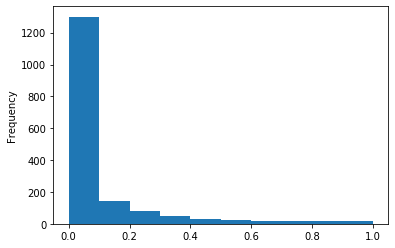

In [131]:
df['NA_Sales'].plot.hist()

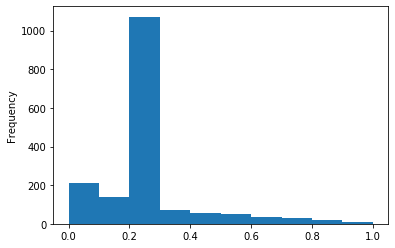

In [132]:
df['Critic_Count'].plot.hist()

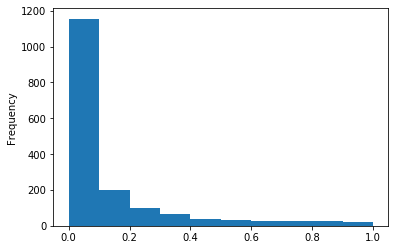

In [133]:
df['Global_Sales'].plot.hist()

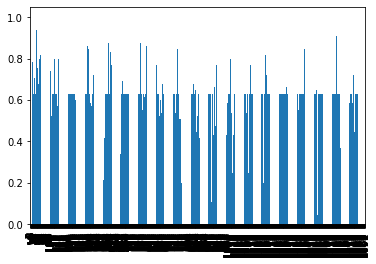

In [134]:
df['Critic_Score'].plot.bar()

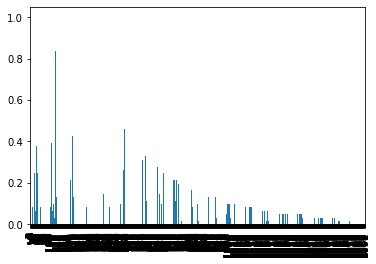

In [135]:
df['JP_Sales'].plot.bar()

In [ ]:
qqplot(df['Other_Sales'],line='s')

In [ ]:
df['Year_of_Release'].describe()

In [ ]:
year=[2014,2015]

In [ ]:
import Dataframe

In [155]:
df['Year_of_Release'].astype(str)

0       2015
1       2014
2       2014
3       2015
4       2015
        ... 
1688    2016
1689    2014
1690    2016
1691    2016
1692    2016
Name: Year_of_Release, Length: 1693, dtype: object

In [160]:
ptr1=df.loc[df['Year_of_Release'].isin(['2014','2015','2016'])]

In [161]:
print(ptr1.head(20))

                                         Name Platform  Year_of_Release  \
0                   Call of Duty: Black Ops 3      PS4             2015   
1                          Grand Theft Auto V      PS4             2014   
2   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
3                                     FIFA 16      PS4             2015   
4                Star Wars Battlefront (2015)      PS4             2015   
5              Call of Duty: Advanced Warfare      PS4             2014   
6                                     FIFA 17      PS4             2016   
7         Super Smash Bros. for Wii U and 3DS      3DS             2014   
8                   Call of Duty: Black Ops 3     XOne             2015   
9                                   Fallout 4      PS4             2015   
10                           Pokemon Sun/Moon      3DS             2016   
11                               Mario Kart 8     WiiU             2014   
12                       

In [162]:
ptr1["EU_Sales"].head(5)

0    0.985075
1    1.000000
2    0.962687
3    0.992537
4    0.962687
Name: EU_Sales, dtype: float64

In [163]:
ptr1.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,2014.953227,0.093712,0.091845,0.066651,0.062830,0.131153,0.630460,0.285641,0.657501,0.409192
std,0.799624,0.183382,0.177475,0.133826,0.142634,0.207623,0.122673,0.160044,0.147749,0.246217
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.008850,0.630769,0.276596,0.658228,0.158854
50%,2015.000000,0.013986,0.014925,0.016393,0.014925,0.039823,0.630769,0.287234,0.658228,0.544271
75%,2016.000000,0.083916,0.089552,0.065574,0.059701,0.150442,0.630769,0.287234,0.721519,0.544271
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
std_dev=ptr1["EU_Sales"].std()

In [166]:
pop_mean=ptr1["EU_Sales"].mean()

In [168]:
sample=df.loc[df['Year_of_Release'].isin(['2016'])]

In [169]:
sample.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,502.0,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,2016.0,0.055387,0.060698,0.053099,0.039246,0.085199,0.636194,0.283589,0.658530,0.394505
std,0.0,0.134598,0.139547,0.111862,0.108892,0.161132,0.125755,0.168294,0.153403,0.246248
min,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.061538,0.000000,0.000000,0.002604
25%,2016.0,0.000000,0.000000,0.000000,0.000000,0.004425,0.630769,0.236702,0.658228,0.125000
50%,2016.0,0.006993,0.007463,0.000000,0.000000,0.022124,0.630769,0.287234,0.658228,0.544271
75%,2016.0,0.034965,0.052239,0.049180,0.029851,0.079646,0.646154,0.287234,0.721519,0.544271
max,2016.0,0.944056,0.977612,0.885246,0.925373,0.973451,0.953846,1.000000,0.936709,0.992188


In [170]:
sample.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6,FIFA 17,PS4,2016,Sports,Electronic Arts,0.454545,0.977612,0.131148,0.925373,0.973451,0.830769,0.404255,0.443038,0.593750,"EA Sports, EA Vancouver",E
10,Pokemon Sun/Moon,3DS,2016,Role-Playing,Nintendo,0.944056,0.761194,0.885246,0.597015,0.955752,0.630769,0.287234,0.658228,0.544271,Nintendo,E
15,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,0.811189,0.932836,0.311475,0.865672,0.933628,0.953846,1.000000,0.822785,0.992188,Naughty Dog,T
22,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,0.790210,0.850746,0.245902,0.805970,0.902655,0.707692,0.808511,0.240506,0.817708,Infinity Ward,M
29,Battlefield 1,PS4,2016,Shooter,Electronic Arts,0.643357,0.902985,0.344262,0.716418,0.871681,0.876923,0.297872,0.886076,0.757813,EA DICE,M
37,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,0.720280,0.791045,0.245902,0.701493,0.836283,0.753846,0.638298,0.708861,0.940104,Massive Entertainment,M
60,FIFA 17,XOne,2016,Sports,Electronic Arts,0.300699,0.865672,0.000000,0.253731,0.743363,0.815385,0.500000,0.506329,0.401042,"EA Sports, EA Vancouver",E
64,Call of Duty: Infinite Warfare,XOne,2016,Shooter,Activision,0.741259,0.507463,0.000000,0.328358,0.725664,0.723077,0.138298,0.202532,0.502604,Infinity Ward,M
69,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.412587,0.694030,0.098361,0.507463,0.712389,0.692308,0.893617,0.607595,0.716146,Ubisoft Montreal,M
70,Battlefield 1,XOne,2016,Shooter,Electronic Arts,0.699301,0.522388,0.000000,0.298507,0.707965,0.861538,0.361702,0.860759,0.622396,EA DICE,M


In [173]:
sample.mean()

Year_of_Release    2016.000000
NA_Sales              0.055387
EU_Sales              0.060698
JP_Sales              0.053099
Other_Sales           0.039246
Global_Sales          0.085199
Critic_Score          0.636194
Critic_Count          0.283589
User_Score            0.658530
User_Count            0.394505
dtype: float64

In [172]:
sample_size=502

In [175]:
sample_size=502

In [176]:
#hypothesis testing for normalized data based on EU_Sales where H0: mean of entire data and H1: mean of data of 2016

#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = 0.060698
pop_mean = 0.091845
sample_size = 502
std_dev = 0.177475

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 0.091845
H1 : μ > 0.091845
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -3.9321574248795845 

Failed to reject NULL hypothesis


In [179]:
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = 0.060698
pop_mean = 0.091845
sample_size =  502
std_dev =  0.177475

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ = 0.091845
H1 : μ != 0.091845
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : -3.9321574248795845 

Reject NULL hypothesis
